In [6]:
import pandas as pd

In [25]:
c10 = KRI.Dataset("../../Data/c10/")

In [26]:
c10.score_all(pd.Timestamp("2016-01-01"), pd.Timestamp("2018-01-01"), pd.Timedelta('50d'))

In [13]:
c10.score_all(0, 1400, 50)

In [13]:
c10._site_active.loc[5]

StartDate    2014-12-09
EndDate      2016-12-20
StartDay              1
EndDay               77
Name: 5, dtype: object

In [6]:
c10.Safety[c10.Safety['Site'] == 5]

Site                 KRI_Type  Start_Time  End_Time     Value  Units
73       5    AE_per_active_subject           0        25  9.066667    NaN
160      5   SAE_per_active_subject           0        25  0.666667    NaN
247      5   RAE_per_active_subject           0        25  0.266667    NaN
334      5  SRAE_per_active_subject           0        25  0.000000    NaN
418      5    AE_per_active_subject          25        50  7.181818    NaN
502      5   SAE_per_active_subject          25        50  0.727273    NaN
586      5   RAE_per_active_subject          25        50  0.363636    NaN
670      5  SRAE_per_active_subject          25        50  0.090909    NaN
747      5    AE_per_active_subject          50        75  4.000000    NaN
822      5   SAE_per_active_subject          50        75  0.142857    NaN
897      5   RAE_per_active_subject          50        75  0.142857    NaN
972      5  SRAE_per_active_subject          50        75  0.000000    NaN
1031     5    AE_per_active_subject          75       100  3.000000    NaN
1086     5   SAE_per_active_subject          75       100  0.000000    NaN
1141     5   RAE_per_active_subject          75       100  0.000000    NaN
1196     5  SRAE_per_active_subject          75       100  0.000000    NaN

In [14]:
bad = []
clean_VS = {}
for site_num in c10._site_list:
    site_table = c10.VS_Trend[c10.VS_Trend['Site'] == site_num]

    right_bool = site_table.End_Time < c10._site_active.loc[site_num].EndDay
    in_range = site_table[right_bool]

    if in_range.Value.isna().any():
        bad.append(site_num)
        

    temp =[]

    for kri_name in in_range.KRI_Type.unique():
        if kri_name.split('_')[-1] == 'mean':
            temp.append(in_range.set_index(['KRI_Type', 'Start_Time']).loc[kri_name].Value.rename(kri_name))

    clean_frame = pd.DataFrame(temp).T
    clean_VS[site_num] = clean_frame
    

clean_list = list(clean_VS[3].interpolate(limit_area='inside', limit=2).columns)

corrs = []
weird = []

for site, clean_frame in clean_VS.items():
    if clean_frame.shape[0]>5:
        try:
            temp = clean_frame[clean_list].interpolate(limit_area='inside', limit=2)
            corrs.append(temp.corr())
        except:
            weird.append(site)

In [119]:
weird

[]

In [15]:
out = [df.values for df in corrs]

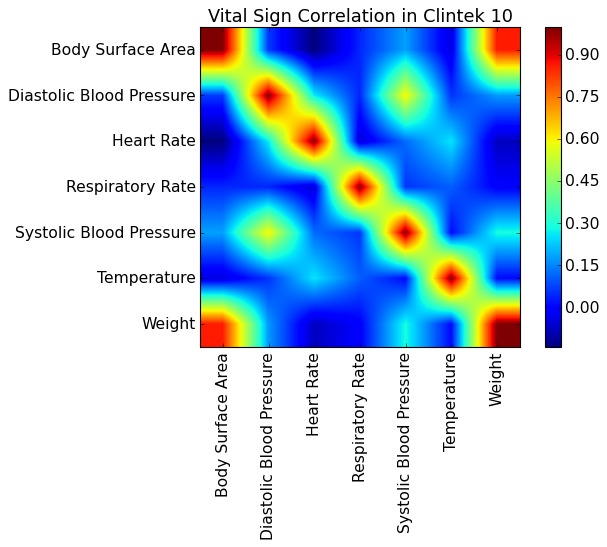

In [18]:
clean_list_plot = [" " .join(bro.split('_')[:-1]).title() for bro in clean_list ]

plt.imshow(sum(out)/sum(out).max())
plt.xticks(range(7),clean_list_plot, rotation=90)
plt.yticks(range(7),clean_list_plot)
plt.colorbar()
plt.title('Vital Sign Correlation in Clintek 10')
plt.show()

In [20]:
bad = []
clean_VS = {}
for site_num in c10._site_list:
    site_table = c10.LB_Trend[c10.LB_Trend['Site'] == site_num]

    right_bool = site_table.End_Time < c10._site_active.loc[site_num].EndDay
    in_range = site_table[right_bool]

    if in_range.Value.isna().any():
        bad.append(site_num)
        

    temp =[]

    for kri_name in in_range.KRI_Type.unique():
        if kri_name.split('_')[-1] == 'mean':
            temp.append(in_range.set_index(['KRI_Type', 'Start_Time']).loc[kri_name].Value.rename(kri_name))

    clean_frame = pd.DataFrame(temp).T
    clean_VS[site_num] = clean_frame
    

clean_list = list(clean_VS[3].interpolate(limit_area='inside', limit=2).columns)

corrs = []
weird = []

for site, clean_frame in clean_VS.items():
    if clean_frame.shape[0]>5:
        try:
            temp = clean_frame[clean_list].interpolate(limit_area='inside', limit=2)
            corrs.append(temp.corr())
        except:
            weird.append(site)

In [21]:
out = [df.fillna(0).values for df in corrs]

Text(0.5, 1.0, 'Lab Test Correlations')

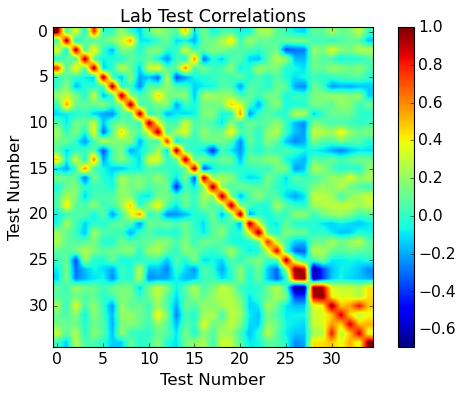

In [24]:
clean_list_plot = [" " .join(bro.split('_')[:-1]).title() for bro in clean_list ]

plt.imshow(sum(out)/sum(out).max())
plt.xlabel('Test Number')
plt.ylabel('Test Number')
plt.colorbar()
plt.title('Lab Test Correlations')

In [117]:
clean_list

['alanine_aminotransferase_mean',
 'albumin_mean',
 'alkaline_phosphatase_mean',
 'amylase_mean',
 'aspartate_aminotransferase_mean',
 'bicarbonate_mean',
 'bilirubin_mean',
 'blood_urea_nitrogen_mean',
 'calcium_mean',
 'chloride_mean',
 'creatine_kinase_mean',
 'creatinine_mean',
 'direct_bilirubin_mean',
 'glucose_mean',
 'lactate_dehydrogenase_mean',
 'lipase_mean',
 'magnesium_mean',
 'phosphate_mean',
 'potassium_mean',
 'protein_mean',
 'sodium_mean',
 'thyrotropin_mean',
 'urate_mean',
 'basophils_mean',
 'eosinophils_mean',
 'ery_mean_corpuscular_hgb_concentration_mean',
 'ery_mean_corpuscular_hemoglobin_mean',
 'ery_mean_corpuscular_volume_mean',
 'erythrocytes_mean',
 'hemoglobin_mean',
 'leukocytes_mean',
 'lymphocytes_mean',
 'monocytes_mean',
 'neutrophils_mean',
 'platelets_mean']

In [166]:
bad = []
clean_VS = {}
for site_num in c10._site_list:
    site_table = c10.Safety[c10.Safety['Site'] == site_num]

    right_bool = site_table.End_Time < c10._site_active.loc[site_num].EndDay
    in_range = site_table[right_bool]

    if in_range.Value.isna().any():
        bad.append(site_num)
        

    temp =[]

    for kri_name in in_range.KRI_Type.unique():
        temp.append(in_range.set_index(['KRI_Type', 'Start_Time']).loc[kri_name].Value.rename(kri_name))

    clean_frame = pd.DataFrame(temp).T
    clean_VS[site_num] = clean_frame
    

clean_list = list(clean_VS[3].interpolate(limit_area='inside', limit=2).columns)

corrs = []
weird = []

for site, clean_frame in clean_VS.items():
    if clean_frame.shape[0]>5:
        try:
            temp = clean_frame[clean_list].interpolate(limit_area='inside', limit=2).fillna(0)
            corr = temp.corr()
            if not temp.corr().isna().any().any():
                corrs.append(corr)
        except:
            weird.append(site)

In [167]:
out = [df.values for df in corrs]

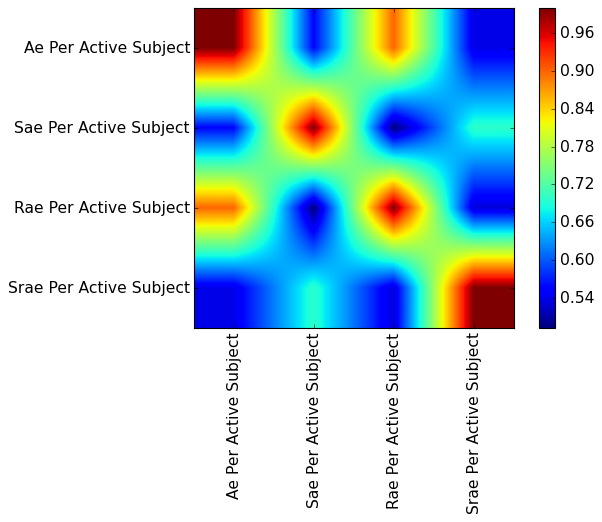

In [173]:
clean_list_plot = [" " .join(bro.split('_')).title() for bro in clean_list ]

plt.imshow(sum(out)/sum(out).max())
plt.xticks(range(4),clean_list_plot, rotation=90)
plt.yticks(range(4),clean_list_plot)
plt.colorbar()

In [4]:
bad = []
clean_VS = {}
for site_num in c10._site_list:
    site_table = c10.IP_Management[c10.IP_Management['Site'] == site_num]

    right_bool = site_table.End_Time < c10._site_active.loc[site_num].EndDate
    in_range = site_table[right_bool]

    if in_range.Value.isna().any():
        bad.append(site_num)
        

    temp =[]

    for kri_name in in_range.KRI_Type.unique():
        temp.append(in_range.set_index(['KRI_Type', 'Start_Time']).loc[kri_name].Value.rename(kri_name))

    clean_frame = pd.DataFrame(temp).T
    clean_VS[site_num] = clean_frame
    

clean_list = list(clean_VS[3].interpolate(limit_area='inside', limit=2).columns)

corrs = []
weird = []

for site, clean_frame in clean_VS.items():
    if clean_frame.shape[0]>5:
        try:
            temp = clean_frame[clean_list].interpolate(limit_area='inside', limit=2).fillna(0)
            corr = temp.corr()
            if not temp.corr().isna().any().any():
                corrs.append(corr)
        except:
            weird.append(site)

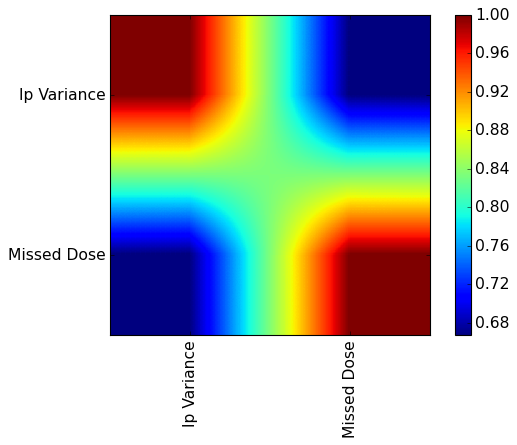

In [177]:
out = [df.values for df in corrs]

clean_list_plot = [" " .join(bro.split('_')).title() for bro in clean_list ]

plt.imshow(sum(out)/sum(out).max())
plt.xticks(range(2),clean_list_plot, rotation=90)
plt.yticks(range(2),clean_list_plot)
plt.colorbar()

In [27]:
bad = []
clean_VS = {}
for site_num in c10._site_list:
    temp =[]
    for domain in ['Safety', 'Data_Quality', 'IP_Management', 'SB_Management', 'LB_Management']:
        df = getattr(c10, domain)
        site_table = df[df['Site'] == site_num]

        right_bool = site_table.End_Time < c10._site_active.loc[site_num].EndDate
        in_range = site_table[right_bool]

        if in_range.Value.isna().any():
            bad.append(site_num)



        for kri_name in in_range.KRI_Type.unique():
            temp.append(in_range.set_index(['KRI_Type', 'Start_Time']).loc[kri_name].Value.rename(kri_name))

    clean_frame = pd.DataFrame(temp).T
    clean_VS[site_num] = clean_frame
    

clean_list = list(clean_VS[3].interpolate(limit_area='inside', limit=2).columns)

corrs = []
weird = []

for site, clean_frame in clean_VS.items():
    if clean_frame.shape[0]>5:
        try:
            temp = clean_frame[clean_list].interpolate(limit_area='inside', limit=2).fillna(0)
            corr = temp.corr()
            if not temp.corr().isna().any().any():
                corrs.append(corr)
        except:
            pass

In [28]:
len(corrs)

6

Text(0.5, 1.0, 'KRI Correlation in Clintek 10')

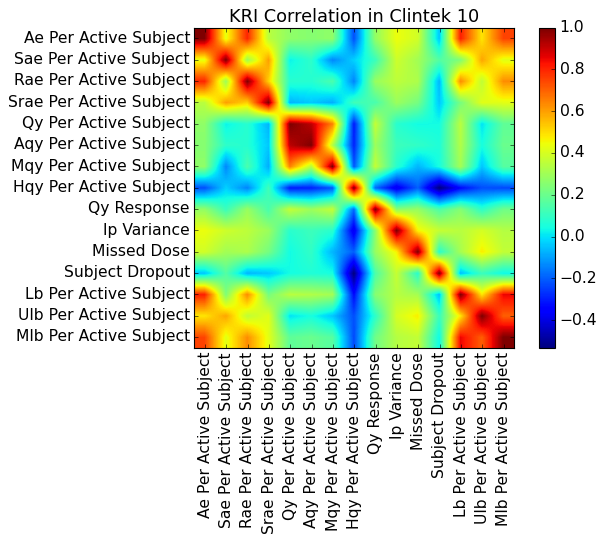

In [11]:
import matplotlib.pyplot as plt
out = [df.values for df in corrs]

clean_list_plot = [" " .join(bro.split('_')).title() for bro in clean_list ]

plt.imshow(sum(out)/sum(out).max())
plt.xticks(range(15),clean_list_plot, rotation=90)
plt.yticks(range(15),clean_list_plot)
plt.colorbar()
plt.title('KRI Correlation in Clintek 10')

In [37]:
pd.DataFrame([df['Subject_Dropout'] for df in corrs]).max().sort_values()

HQY_per_active_subject    -0.258243
MLB_per_active_subject     0.228503
AE_per_active_subject      0.234472
LB_per_active_subject      0.245593
QY_Response                0.306319
RAE_per_active_subject     0.465897
SRAE_per_active_subject    0.500520
QY_per_active_subject      0.600120
AQY_per_active_subject     0.626140
MQY_per_active_subject     0.646587
ULB_per_active_subject     0.681385
IP_variance                0.724464
Missed_Dose                0.789908
SAE_per_active_subject     0.823266
Subject_Dropout            1.000000
dtype: float64

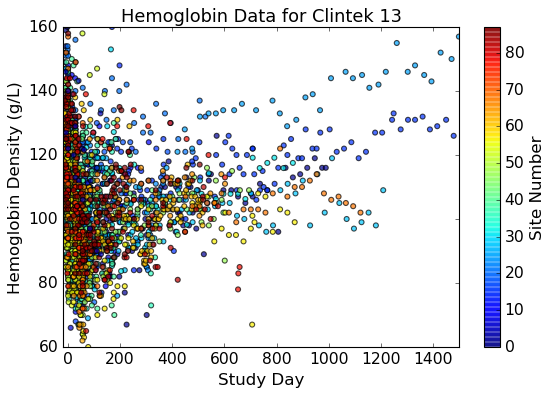

In [33]:
LB = c10.LB

site_to_idx={site: idx for idx, site in enumerate(LB.Site.unique())}

LB['Site Number'] = LB.Site.replace(site_to_idx)

LB[(LB.LBTEST == 'Hemoglobin')].plot.scatter('LBDY','LBSTRESN',c='Site Number', colormap='jet',alpha=.7)
plt.xlabel('Study Day')
plt.ylabel('Hemoglobin Density (g/L)')
plt.xlim([-20,1500])
plt.ylim([60, 160])
plt.title('Hemoglobin Data for Clintek 13')
plt.show()

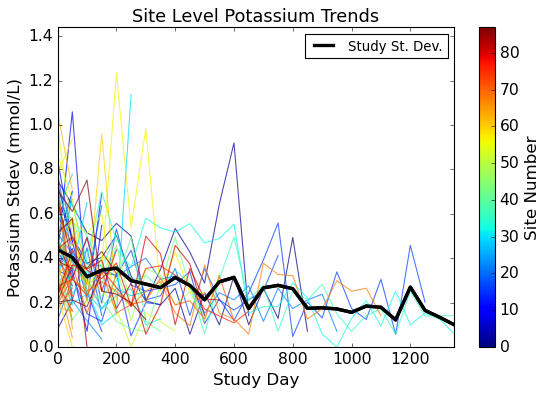

In [4]:
c10.KRI_plot('LB_Trend', 'potassium_stdev', title='Site Level Potassium Trends')

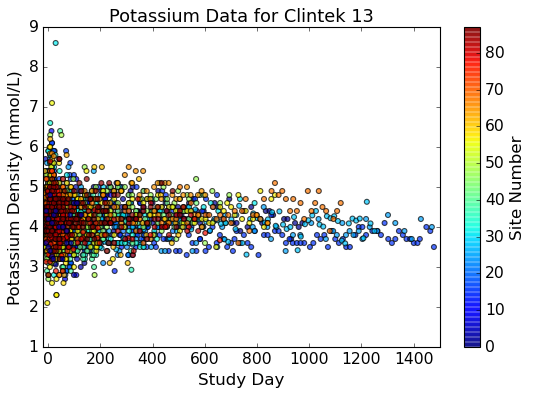

In [49]:
LB = c10.LB

site_to_idx={site: idx for idx, site in enumerate(LB.Site.unique())}

LB['Site Number'] = LB.Site.replace(site_to_idx)

fig, ax = plt.subplots()

LB[(LB.LBTEST == 'Potassium')].plot.scatter('LBDY','LBSTRESN',c='Site Number', ax = ax, colormap='jet',alpha=.7)
plt.xlabel('Study Day')
plt.ylabel('Potassium Density (mmol/L)')
plt.xlim([-20,1500])
plt.title('Potassium Data for Clintek 13')
plt.show()

In [39]:
LB.LBTEST

0                            Potassium
1                            Potassium
2                            Potassium
3                            Potassium
4             Alanine Aminotransferase
                      ...             
149760    Ery. Mean Corpuscular Volume
149761    Ery. Mean Corpuscular Volume
149762    Ery. Mean Corpuscular Volume
149763    Ery. Mean Corpuscular Volume
149764    Ery. Mean Corpuscular Volume
Name: LBTEST, Length: 149765, dtype: object